In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_pre
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_pre
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_pre
from tensorflow.keras.models import Model

# -----------------------------
# Load your favorite image
# -----------------------------
img_path = "image.png"  # replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# -----------------------------
# Helper function to plot feature maps
# -----------------------------
def plot_feature_maps(feature_maps, layer_name, save_path):
    n_features = feature_maps.shape[-1]
    size = feature_maps.shape[1]
    # We'll show up to 16 feature maps
    n_cols = 4
    n_rows = min(n_features // n_cols, 4)
    plt.figure(figsize=(n_cols*2, n_rows*2))
    for i in range(n_rows * n_cols):
        if i >= n_features:
            break
        plt.subplot(n_rows, n_cols, i+1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.suptitle(f"{layer_name} feature maps")
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

# -----------------------------
# Extract and save feature maps
# -----------------------------
models = {
    "VGG16": (VGG16(weights="imagenet", include_top=False), vgg_pre),
    "ResNet50": (ResNet50(weights="imagenet", include_top=False), resnet_pre),
    "InceptionV3": (InceptionV3(weights="imagenet", include_top=False), inception_pre)
}

# Choose three layers per model
layers_to_extract = {
    "VGG16": ["block1_conv1", "block2_conv1", "block3_conv1"],
    "ResNet50": ["conv1_conv", "conv2_block1_1_conv", "conv3_block1_1_conv"],
    "InceptionV3": ["conv2d_1", "conv2d_2", "conv2d_3"]
}

for model_name, (model_base, pre_fn) in models.items():
    # Preprocess image
    img_prep = pre_fn(np.copy(img_array))

    for layer_name in layers_to_extract[model_name]:
        layer_model = Model(inputs=model_base.input,
                            outputs=model_base.get_layer(layer_name).output)
        feature_maps = layer_model.predict(img_prep)
        save_path = f"{model_name}_{layer_name}.png"
        plot_feature_maps(feature_maps, layer_name, save_path)
        print(f"Saved {save_path}")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Saved VGG16_block1_conv1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
Saved VGG16_block2_conv1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
Saved VGG16_block3_conv1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Saved ResNet50_conv1_conv.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
Saved ResNet50_conv2_block1_1_conv.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Saved ResNet50_conv3_block1_1_conv.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
Saved InceptionV3_conv2d_1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
Saved InceptionV3_conv2d_2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
Saved InceptionV3_conv2d_3.png


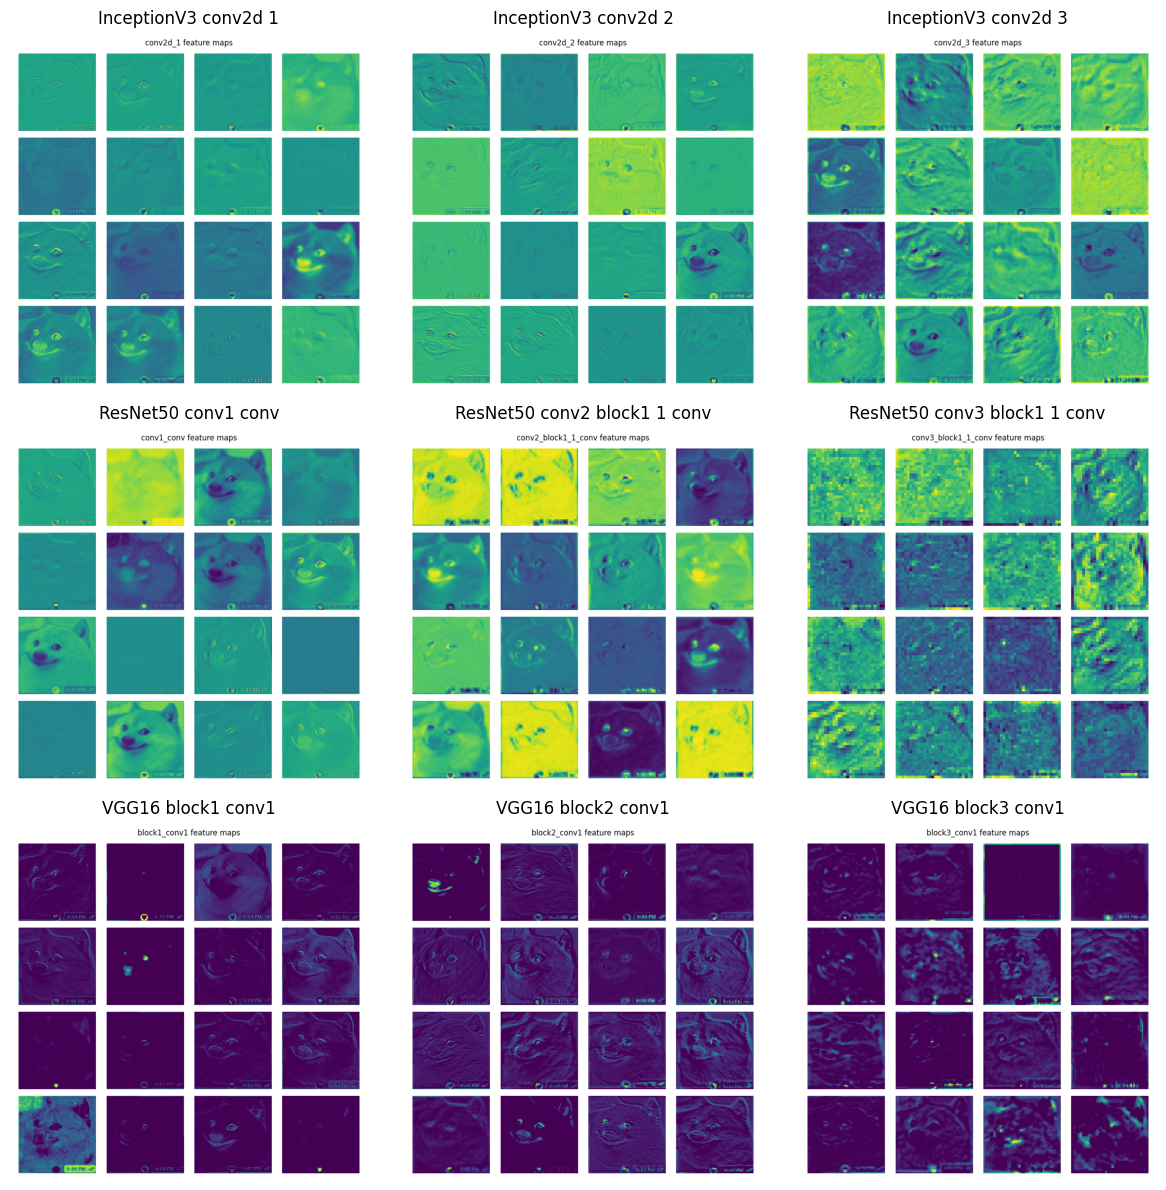

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import os

# Get list of generated image files
image_files = [f for f in os.listdir('.') if f.endswith('.png') and ('VGG16' in f or 'ResNet50' in f or 'InceptionV3' in f)]
image_files.sort() # Sort to ensure consistent order

n_images = len(image_files)
n_cols = 3 # We know there are 9 images, so 3x3 is good
n_rows = math.ceil(n_images / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 4)) # Adjust figure size as needed

for i, img_file in enumerate(image_files):
    plt.subplot(n_rows, n_cols, i + 1)
    img = mpimg.imread(img_file)
    plt.imshow(img)
    plt.title(img_file.replace('.png', '').replace('_', ' ')) # Clean up title
    plt.axis('off')

plt.tight_layout()
plt.show()

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.1161 - loss: 2.3039 - val_accuracy: 0.0450 - val_loss: 2.3160 - learning_rate: 0.0010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1286 - loss: 2.3046 - val_accuracy: 0.0400 - val_loss: 2.3142 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1272 - loss: 2.2939 - val_accuracy: 0.0500 - val_loss: 2.3139 - learning_rate: 0.0010
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1335 - loss: 2.2908 - val_accuracy: 0.0450 - val_loss: 2.3147 - learning_rate: 0.0010
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1203 - loss: 2.2947 - val_accuracy: 0.0600 - val_loss: 2.3124 - learning_rate: 0.0010
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1353 - loss: 2.2864 - val_accuracy: 0.0550 - val_loss: 2.3141 - learning_rate: 0.0010
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1235 - loss: 2.2844 - val_accuracy:

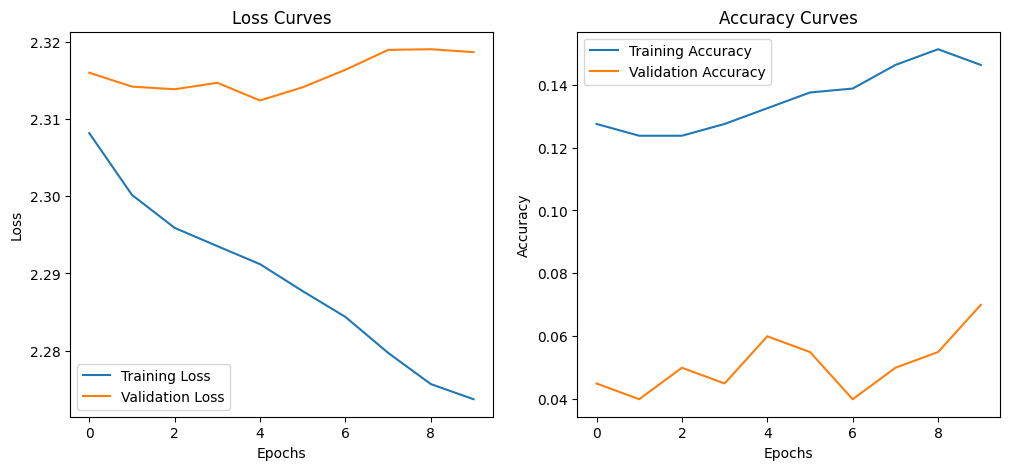

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# -------------------------------
# Create dummy data
# -------------------------------
# 1000 samples, 8 features, 10 classes
X_train = np.random.rand(800, 8)       # 800 training samples
y_train = tf.keras.utils.to_categorical(np.random.randint(0, 10, 800), num_classes=10)
X_val = np.random.rand(200, 8)         # 200 validation samples
y_val = tf.keras.utils.to_categorical(np.random.randint(0, 10, 200), num_classes=10)

# -------------------------------
# Define callbacks
# -------------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
callbacks_list = [early_stop, reduce_lr]

# -------------------------------
# Build example FCFNN model
# -------------------------------
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -------------------------------
# Train model with callbacks
# -------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=callbacks_list
)

# -------------------------------
# Plot training and validation curves
# -------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()